Found 150 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
{'face': 0, 'nonface': 1}
{'face': 0, 'nonface': 1}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)        0         
_________

Epoch 46/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0233 - acc: 0.9934 - val_loss: 0.2369 - val_acc: 0.9167
Epoch 47/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0183 - acc: 0.9868 - val_loss: 0.2855 - val_acc: 0.9167
Epoch 48/100
38/38 [==============================] - 5s 127ms/step - loss: 0.1054 - acc: 0.9605 - val_loss: 0.2057 - val_acc: 0.9167
Epoch 49/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0579 - acc: 0.9803 - val_loss: 0.1014 - val_acc: 0.9167
Epoch 50/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0175 - acc: 0.9934 - val_loss: 0.3093 - val_acc: 0.9167
Epoch 51/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.2800 - val_acc: 0.9167
Epoch 52/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0128 - acc: 0.9934 - val_loss: 0.1659 - val_acc: 0.9167
Epoch 53/100
38/38 [==============================] - 5s 130ms

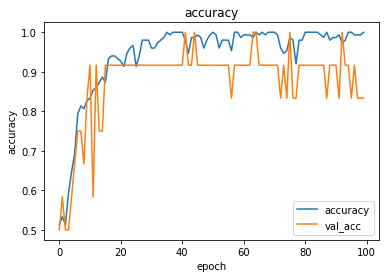

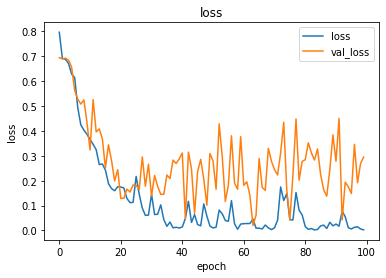

In [6]:
# 訓練データとテストデータの生成
from keras.preprocessing.image import ImageDataGenerator

img_w, img_h = 150, 150  # リサイズするときのサイズ
batch_size = 4           # ミニバッチのサイズ

# 訓練データを読み込むジェネレータ
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)

# テストデータを読み込むジェネレータ
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

# 訓練データをミニバッチの数だけ生成
train_generator = train_datagen.flow_from_directory(
    'data/train',                  # 訓練データのフォルダー
    target_size = (img_w, img_h),  # 画像をリサイズ
    batch_size = batch_size,       # ミニバッチのサイズ
    class_mode = 'binary'          # 二値分類なのでbinaryを指定
)

# テストデータをミニバッチの数だけ生成
validation_generator = test_datagen.flow_from_directory(
    'data/validation',             # テストデータのフォルダー
    target_size = (img_w, img_h),  # 画像をリサイズ
    batch_size = batch_size,       # ミニバッチのサイズ
    class_mode = 'binary'          # 二値分類なのでbinaryを指定
)


# 正解ラベルの割り当てを確認する
print(train_generator.class_indices)
print(validation_generator.class_indices)


"""CNNを構築"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import optimizers

# モデルの構築
model = Sequential()

# (第1層)畳み込み層
model.add(
    Conv2D(
        filters = 64,                 # フィルターの数は32
        kernel_size = (3, 3),         # 3×3のフィルターを使用
        input_shape = (150, 150, 3),  # 入力データの形状
        padding = 'same',             # ゼロパディングを行う
        activation = 'relu'           # 活性化関数はReLU
    )
)
# (第2層)プーリング層
model.add(
    MaxPooling2D(pool_size = (3, 3))
)
# ドロップアウト25%
model.add(Dropout(0.25))

# (第3層)畳み込み層
model.add(
    Conv2D(
        filters = 64,                 # フィルターの数は32
        kernel_size = (3, 3),         # 3×3のフィルターを使用
        activation = 'relu'           # 活性化関数はReLU
    )
)
# (第4層)プーリング層
model.add(
    MaxPooling2D(pool_size = (3, 3))
)
# ドロップアウト25%
model.add(Dropout(0.25))

# (第5層)畳み込み層
model.add(
    Conv2D(
        filters = 32,                 # フィルターの数は64
        kernel_size = (3, 3),         # 3×3のフィルターを使用
        activation = 'relu'           # 活性化関数はReLU
    )
)
# (第6層)プーリング層
model.add(
    MaxPooling2D(pool_size = (3, 3))
)
# ドロップアウト25%
model.add(Dropout(0.25))

# Flatten層
# 出力層への入力を4階テンソルから2階テンソルに変換する
model.add(Flatten())

# (第7層)全結合層
model.add(
    Dense(
        64,                  # ニューロン数は64
        activation = 'tanh'  # 活性化関数はTanh
    )
)

# ドロップアウト25%
model.add(Dropout(0.25))


# (第8層)出力層
model.add(
    Dense(
        1,                      # ニューロン数は1個
        activation = 'sigmoid'  # 活性化関数はsigmoid
    )
)

# モデルのコンパイル
model.compile(
    loss = 'binary_crossentropy',  # バイナリ用の交差エントロピー誤差
    metrics = ['accuracy'],        # 学習評価として正解率を指定
    # Adamアルゴリズムで最適化
    optimizer = optimizers.Adam()
)

# モデルのサマリを表示
model.summary()


"""CNNにfaceとnonfaceの画像を学習させる"""
epochs = 100              # 学習回数
batch_size = batch_size  # 設定済みのミニバッチのサイズ
validation_num = 150     # 訓練データの総数

# 学習を行う
history = model.fit_generator(
    train_generator,                         # 訓練データ
    epochs = epochs,                         # 学習回数
    steps_per_epoch = len(train_generator),  # ジェネレータのサイズを指定
    validation_steps = validation_num,       # 訓練データの総数
    verbose = 1,                             # 学習の進捗状況を出力する
    validation_data = validation_generator   # テストデータ
)

"""精度と損失の推移をグラフにする"""
%matplotlib inline
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    # 精度の推移をプロット
    plt.plot(history.history['acc'], "-", label = "accuracy")
    plt.plot(history.history['val_acc'], "-", label = "val_acc")
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc = "lower right")
    plt.show()
    
    # 損失の推移をプロット
    plt.plot(history.history['loss'], "-", label = 'loss')
    plt.plot(history.history['val_loss'], "-", label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc = 'upper right')
    plt.show()
    
# 損失と精度をグラフに出力
plot_acc_loss(history)